<a href="https://colab.research.google.com/github/Roony0708/Productionization-of-ML-Systems/blob/main/Gender_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the flight data from the CSV file
flight_path = "/content/drive/MyDrive/ML/Travel_capstone_project/flights.csv"
flight = pd.read_csv(flight_path)

# Load the hotel data from the CSV file
hotel_path = "/content/drive/MyDrive/ML/Travel_capstone_project/hotels.csv"
hotel = pd.read_csv(hotel_path)

# Load the users data from the CSV file
users_path = "/content/drive/MyDrive/ML/Travel_capstone_project/users.csv"
users = pd.read_csv(users_path)

In [5]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [7]:
users.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [8]:
users['gender'].value_counts()

gender
male      452
female    448
none      440
Name: count, dtype: int64

In [9]:
users=users[(users['gender']=='male') | (users['gender']=='female') ]

In [10]:
# Encoding userCode and company to numeric values
label_encoder = LabelEncoder()

users['company_encoded'] = label_encoder.fit_transform(users['company'])
users['gender_encoded'] = label_encoder.fit_transform(users['gender'])

users.head()

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0


In [11]:
# prompt: Initialize the SentenceTransformer model

model = SentenceTransformer('all-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
# Encode text-based columns and create embeddings

text_columns = ['name']

for column in text_columns:
    users[column + '_embedding'] = users[column].apply(lambda text: model.encode(text))



In [13]:
text_embeddings = users[text_columns].values.tolist()

In [14]:
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
text_columns = ['name']


In [15]:
# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(users), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = users[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

numerical_features=['code','company_encoded','age']


X_numerical = users[numerical_features].values

In [16]:
# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))

y = users['gender_encoded']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic regression

In [18]:
# Initialize a Logistic Regression Classifier

logistic_model = LogisticRegression(random_state=42)


In [19]:
# Fit the model to the training data

logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [20]:

# Predict the gender of users in the test set
y_pred_logistic = logistic_model.predict(X_test)

# Print the predicted gender values
print(y_pred_logistic)


[1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


In [21]:
# Calculate and print accuracy

from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_logistic)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.9708333333333333
Validation Accuracy: 0.9666666666666667
The model is overfitting.


# Decision Tree Classifier

In [23]:
# Initialize a Random Forest Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = dt_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n", report)




Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59        77
           1       0.70      0.74      0.72       103

    accuracy                           0.67       180
   macro avg       0.66      0.65      0.66       180
weighted avg       0.66      0.67      0.66       180



In [24]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9611111111111111
The model is overfitting.


# Random Forest Classifier

In [25]:


# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)




Accuracy: 0.9611111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        77
           1       0.94      0.99      0.97       103

    accuracy                           0.96       180
   macro avg       0.97      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [26]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9777777777777777
The model is overfitting.


# Gradient Boosting Classifier

In [27]:

# Initialize a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = gb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_gb)
print("\nClassification Report:\n", report)




Accuracy: 0.5666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.64      0.56        77
           1       0.65      0.51      0.58       103

    accuracy                           0.57       180
   macro avg       0.57      0.58      0.57       180
weighted avg       0.59      0.57      0.57       180



In [28]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = gb_classifier.predict(X_train)
y_val_pred = gb_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


Training Accuracy: 1.0
Validation Accuracy: 0.9666666666666667
The model is overfitting.


# ROC-AUC Curve

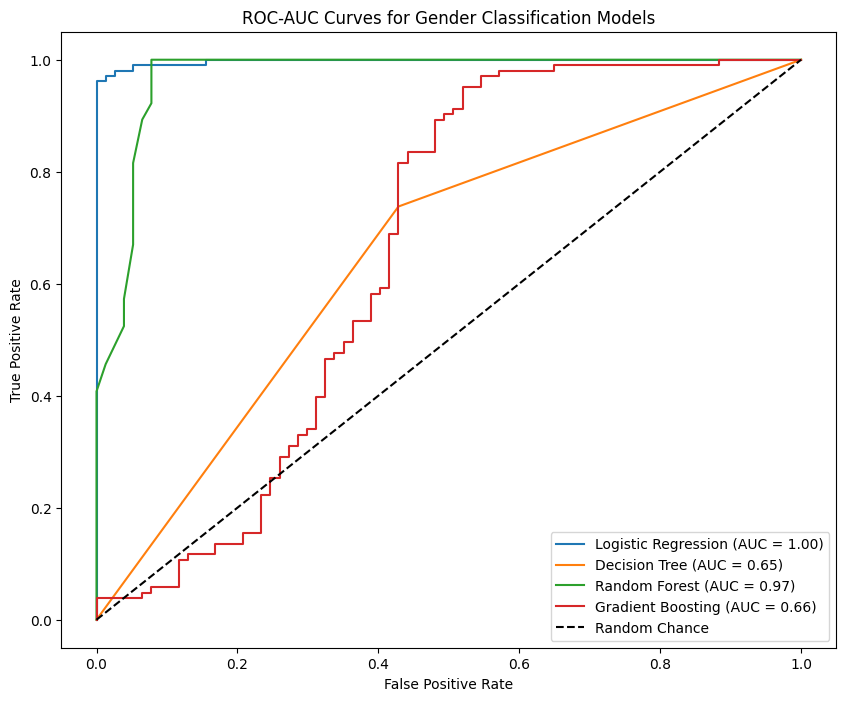

In [29]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Decision Tree
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Random Forest
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Gradient Boosting
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, label="Logistic Regression (AUC = %0.2f)" % logistic_auc)
plt.plot(dt_fpr, dt_tpr, label="Decision Tree (AUC = %0.2f)" % dt_auc)
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = %0.2f)" % rf_auc)
plt.plot(gb_fpr, gb_tpr, label="Gradient Boosting (AUC = %0.2f)" % gb_auc)

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Gender Classification Models")
plt.legend()
plt.show()


# Model selection and Hyperparameter Tuning


In [30]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Perform Grid Search Cross-Validation
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Logistic Regression model with the best hyperparameters
logistic_model_tuned = LogisticRegression(**best_params)
logistic_model_tuned.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred_tuned = logistic_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Accuracy of tuned Logistic Regression model:", accuracy_tuned)



Accuracy of tuned Logistic Regression model: 0.9611111111111111


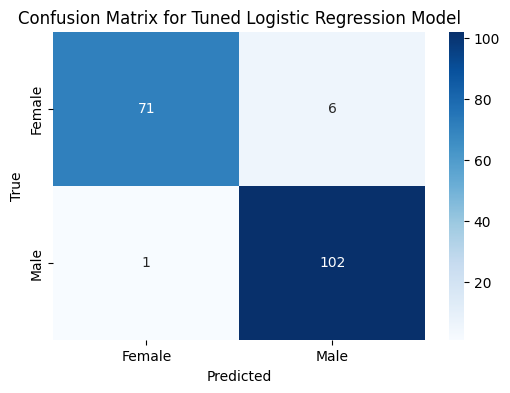

In [31]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the gender of users in the test set using the tuned model
y_pred_tuned = logistic_model_tuned.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Define labels for the confusion matrix
labels = ['Female', 'Male']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Tuned Logistic Regression Model")
plt.show()


# Pickle the models

In [32]:

import pickle

# Save the tuned Logistic Regression model
with open('/content/drive/MyDrive/ML/Travel_capstone_project/logistic_model_tuned.pkl', 'wb') as f:
    pickle.dump(logistic_model_tuned, f)

# Save the scaler
with open('/content/drive/MyDrive/ML/Travel_capstone_project/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the PCA model
with open('/content/drive/MyDrive/ML/Travel_capstone_project/pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)
